In [2]:
library(mlbench); library(ggplot2); library(GGally)

## Loading Data
Package `mlbench` comes with the original Boston Housing dataset plus five additional features. 

In [3]:
data(BostonHousing2); bh2 <- BostonHousing2

One of those additional features is the Census tract number for each observation. We will use that feature as an index. It's good practice to set an index.

In [4]:
# indexing dataframe using Census tract code
rownames(bh2) <- bh2$tract

removing attributes in updated dataset BostonHousing2 and not in original BostonHousing except tract (Census tract code)

In [5]:
bh2 <- subset(bh2, select = -c(cmedv, town, lon, lat, tract))

str(bh2)

'data.frame':	506 obs. of  14 variables:
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...


In [6]:
summary(bh2)

      medv            crim                zn             indus       chas   
 Min.   : 5.00   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471  
 1st Qu.:17.02   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1: 35  
 Median :21.20   Median : 0.25651   Median :  0.00   Median : 9.69          
 Mean   :22.53   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14          
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10          
 Max.   :50.00   Max.   :88.97620   Max.   :100.00   Max.   :27.74          
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Ma

### Pulling Samples of Different Sizes

setting seed because I want the same random numbers everytime I run my code

In [7]:
set.seed(10)
n_obs <- dim(bh2)[1]

sample_30 <- bh2[sample(1:n_obs, 30, replace=FALSE),]
sample_50 <- bh2[sample(1:n_obs, 50, replace=FALSE),]
sample_250 <- bh2[sample(1:n_obs, 250, replace=FALSE),]

### Comparing Samples to the Original Data
Recall that depending on what we're trying to infer from the data, the original dataset could be *samples* or the *population*.

`hsv(h=1, s=1, v=1,alpha)` creates a vector of colors fr vectors specifying hue, saturation, and value

In [8]:
show_pp <- function(data, c = hsv(s=1,v=1,h = runif(n=1, min=0, max=1))) {
    pp <- ggpairs(data, 
                  upper = list(continuous = wrap(ggally_cor, alpha = 0)),
                  lower = list(continuous = wrap(ggally_points,
                                                 color = c,
                                                 size = 1))
                )
    # suppressing `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
    suppressMessages(print(pp))
}

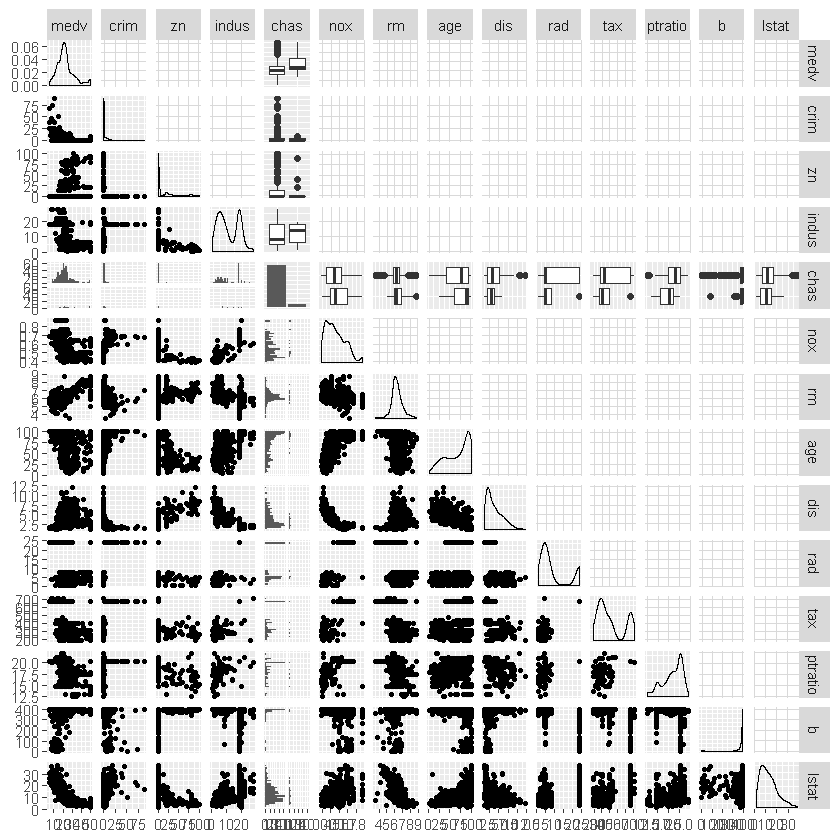

In [9]:
show_pp(bh2, c = 'black')

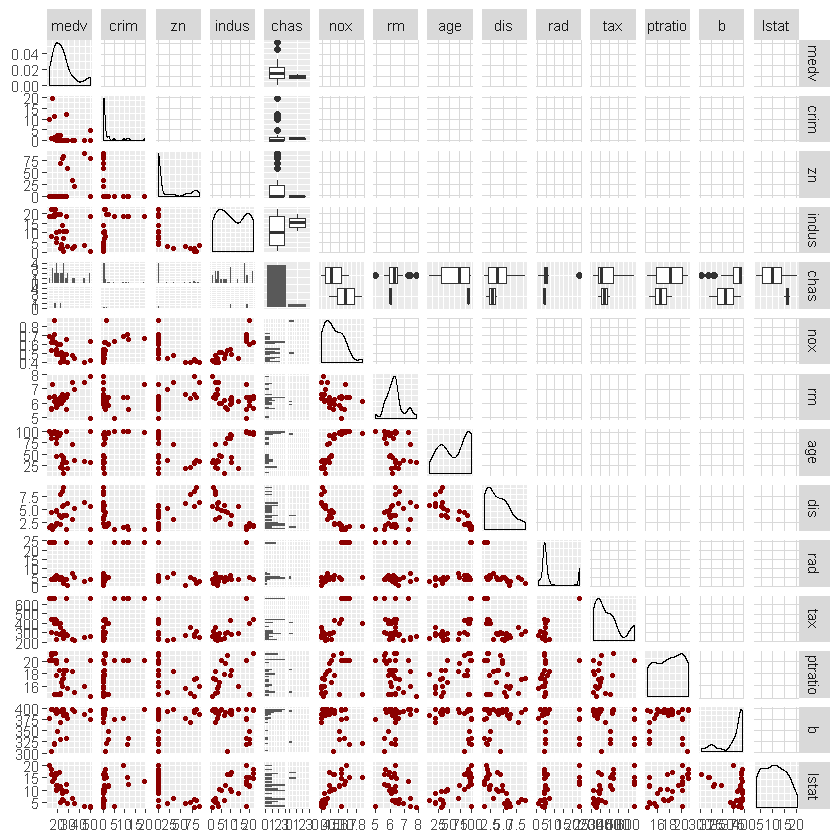

In [10]:
show_pp(sample_30, c = 'darkred')

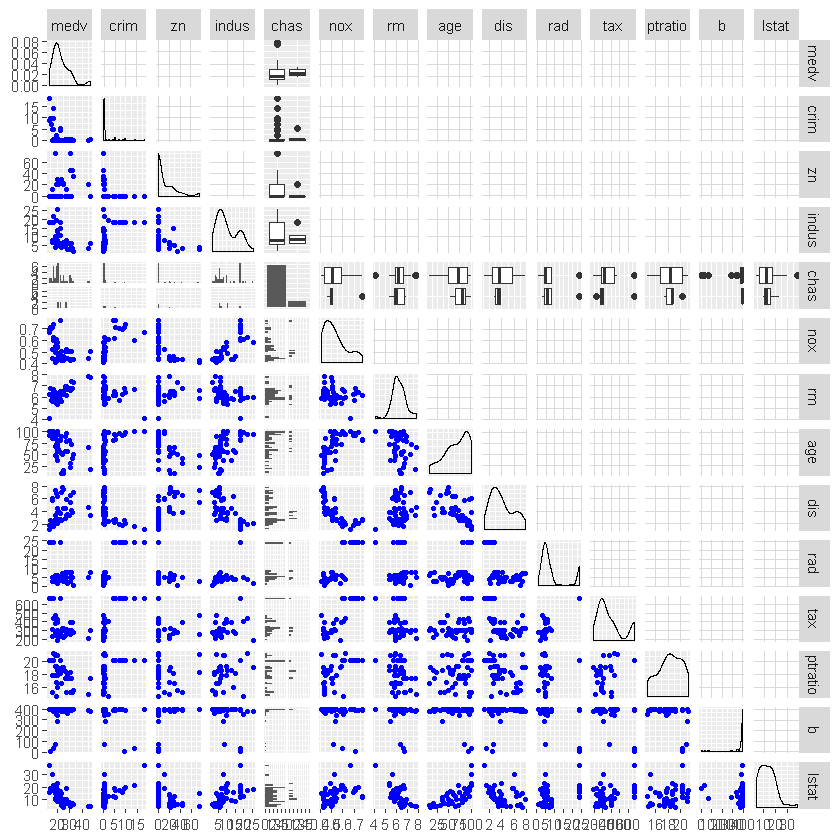

In [11]:
show_pp(sample_50, c = 'blue')

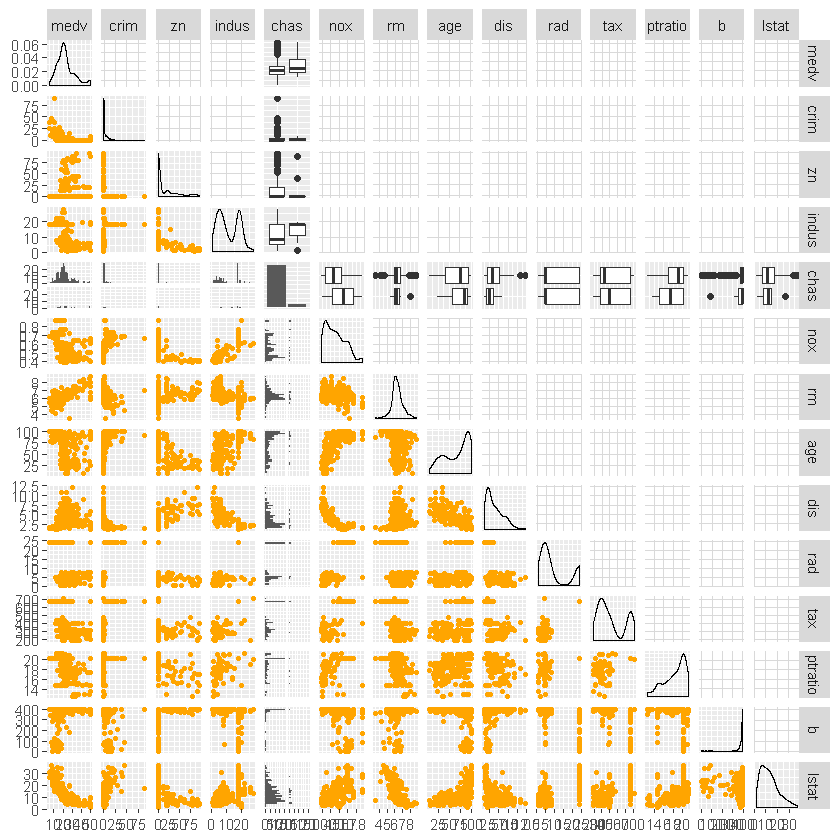

In [8]:
show_pp(sample_250, c = 'orange')

### Means of Samples
Let's look at the means of the samples compared to the original dataset. This is important because when we don't have access to the original dataset, one of the most important pieces of information that we would infer from the sample is the mean of the original dataset. The Central Limit Theorem tells us we can estimate the mean of the original dataset, 'the population', from the sample. 

##### `annotate(geom)`
`annotate(geom)` adds geoms to a plot, but unlike a typical geom function, the properties of the geoms are not mapped from variables of a data frame, but are instead passed in as vectors. This is useful for adding small annotations (such as text labels) or if you have your data in vectors, and for some reason don't want to put them in a data frame. 

In [13]:
plot_histMean <- function(df, feature, c = 'black') {
    df <- Filter(is.numeric, df)
    meann <- round(mean(df[[feature]]), digits = 2)
    
    gg <- ggplot(data = df) + 
            # bins = 30 so we don't get a message suggesting to play w/ bins
            geom_histogram(aes_string(x = feature), bins = 30, fill = c, alpha = 0.3) 
            
    
    x_center <- max(df[[feature]]) + min(df[[feature]]); x_center <- x_center /2
    y_center <- max(ggplot_build(gg)[['data']][[1]][['count']]); y_center <- y_center/2
    
    gg <- gg + 
            geom_vline(xintercept = meann) +
            annotate(geom = 'text', label = meann, 
                     x = x_center, y = y_center, 
                     col = c, size = 4, 
                     fontface = 'bold')
    return(gg)
}

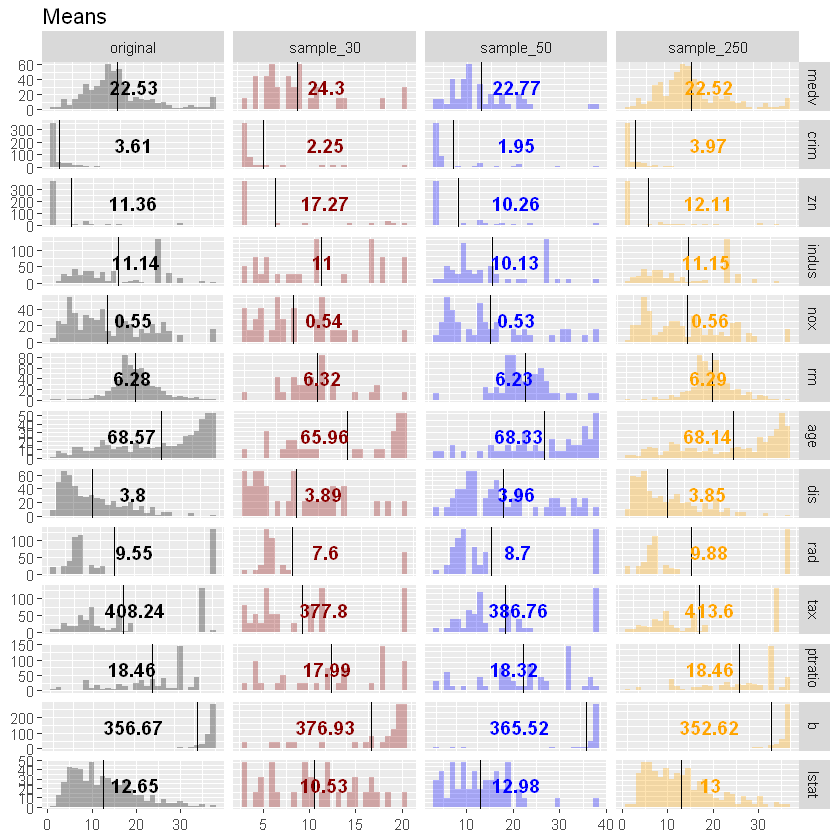

In [15]:
bh2_num <- Filter(is.numeric, bh2)

plots <- list(); 
for (feat in colnames(bh2_num)) {
    plots[[length(plots) + 1]] <- plot_histMean(bh2_num, feat)
    plots[[length(plots) + 1]] <- plot_histMean(sample_30, feat, c = 'darkred')
    plots[[length(plots) + 1]] <- plot_histMean(sample_50, feat, c = 'blue')
    plots[[length(plots) + 1]] <- plot_histMean(sample_250, feat, c = 'orange')
}

gg <- ggmatrix(plots, 13,4, 
               title = 'Means',
               xAxisLabels = c('original', 'sample_30', 'sample_50', 'sample_250'),
               yAxisLabels = colnames(bh2_num))
gg